In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [4]:
data=pd.concat([train,test])
data.reset_index(inplace=True,drop=True)
data.drop('id',axis=1,inplace=True)

In [5]:
#80% of keyword data is missing.. better to drop that feature
data.isna().sum()/len(data)*100
data.drop(['keyword','location'],axis=1,inplace=True)

In [6]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
# More data cleaning in general
data['text']=data['text'].str.replace('\d', '')
data["text"] = data["text"].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"")
data["text"] = data["text"].str.replace(r"We're", "We are")
data["text"] = data["text"].str.replace(r"That's", "That is")
data["text"] = data["text"].str.replace(r"won't", "will not")
data["text"] = data["text"].str.replace(r"they're", "they are")
data["text"] = data["text"].str.replace(r"Can't", "Cannot")
data["text"] = data["text"].str.replace(r"wasn't", "was not")
data["text"] = data["text"].str.replace(r"don\x89Ûªt", "do not")
data["text"] = data["text"].str.replace(r"aren't", "are not")
data["text"] = data["text"].str.replace(r"isn't", "is not")
data["text"] = data["text"].str.replace(r"You're", "You are")
data["text"] = data["text"].str.replace(r"I'M", "I am")
data["text"] = data["text"].str.replace(r"shouldn't", "should not")
data["text"] = data["text"].str.replace(r"wouldn't", "would not")
data["text"] = data["text"].str.replace(r"i'm", "I am")
data["text"] = data["text"].str.replace(r"We've", "We have")
data["text"] = data["text"].str.replace(r"Didn't", "Did not")
data["text"] = data["text"].str.replace(r"it's", "it is")
data["text"] = data["text"].str.replace(r"can't", "cannot")
data["text"] = data["text"].str.replace(r"don't", "do not")
data["text"] = data["text"].str.replace(r"you're", "you are")
data["text"] = data["text"].str.replace(r"I've", "I have")
data["text"] = data["text"].str.replace(r"Don't", "do not")
data["text"] = data["text"].str.replace(r"I'll", "I will")
data["text"] = data["text"].str.replace(r"Let's", "Let us")
data["text"] = data["text"].str.replace(r"Could've", "Could have")
data["text"] = data["text"].str.replace(r"youve", "you have")
data["text"] = data["text"].str.replace(r"It's", "It is")

In [8]:
data['text']

0        Our Deeds are the Reason of this #earthquake M...
1                   Forest fire near La Ronge Sask. Canada
2        All residents asked to 'shelter in place' are ...
3        , people receive #wildfires evacuation orders ...
4        Just got sent this photo from Ruby #Alaska as ...
                               ...                        
10871    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
10872    Storm in RI worse than last hurricane. My city...
10873                    Green Line derailment in Chicago 
10874          MEG issues Hazardous Weather Outlook (HWO) 
10875    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 10876, dtype: object

In [9]:
lemmatizer=WordNetLemmatizer()
sw=stopwords.words("english")
sw.append("u")
sw.append("im")
#Don't forget word_tokenize() and lower()

In [10]:
data['tweet_length']=data['text'].apply(lambda x: len([(w) for w in str(x).split()]))

In [11]:
data['unique_length']=data['text'].apply(lambda x: len([(w) for w in set(str(x).split() ) ]))

In [15]:
data

,text,target,tweet_length,unique_length
0,our deeds are the reason of this #earthquake m...,1.0,13,13
1,forest fire near la ronge sask. canada,1.0,7,7
2,all residents asked to 'shelter in place' are ...,1.0,22,20
3,", people receive #wildfires evacuation orders ...",1.0,8,8
4,just got sent this photo from ruby #alaska as ...,1.0,16,15
...,...,...,...,...
10871,earthquake safety los angeles ûò safety faste...,NaN,8,7
10872,storm in ri worse than last hurricane. my city...,NaN,23,22
10873,green line derailment in chicago,NaN,5,5
10874,meg issues hazardous weather outlook (hwo),NaN,6,6


In [13]:
def lemmatize_tokenize(document):
    #lem=WordNetLemmatizer()
    stemmer = SnowballStemmer(language='english')
    token=word_tokenize(document)
    return [stemmer.stem(t) for t in token if t.isalpha()
                        and t.lower() not in sw]

In [14]:
#Lowercase, lemmatize, tokenize, vectorize (+ remove stopwords,ngrams, even lowercase here) Does vectorization already tokenzie for you?
data['text']=data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#data['text_lem']=[lemmatizer.lemmatize(x) for x in data['text']]

In [16]:
text_lem=[]
y=0
for x in data['text']:
    new_row=[lemmatizer.lemmatize(y) for y in x.split()]
    new_row=' '.join(new_row)
    data.loc[y,'text']=new_row
    y+=1
    #print(new_row)

In [17]:
data

,text,target,tweet_length,unique_length
0,our deed are the reason of this #earthquake ma...,1.0,13,13
1,forest fire near la ronge sask. canada,1.0,7,7
2,all resident asked to 'shelter in place' are b...,1.0,22,20
3,", people receive #wildfires evacuation order i...",1.0,8,8
4,just got sent this photo from ruby #alaska a s...,1.0,16,15
...,...,...,...,...
10871,earthquake safety los angeles ûò safety faste...,NaN,8,7
10872,storm in ri worse than last hurricane. my city...,NaN,23,22
10873,green line derailment in chicago,NaN,5,5
10874,meg issue hazardous weather outlook (hwo),NaN,6,6


In [18]:
tfidf=TfidfVectorizer(ngram_range=(1,3),stop_words=sw)

In [19]:
X=tfidf.fit_transform(data['text'])

In [20]:
from sklearn.decomposition import TruncatedSVD
pca=TruncatedSVD(n_components=2)
X_pca=pca.fit_transform(X)

2D feature reduction explains variance of 0.601 %


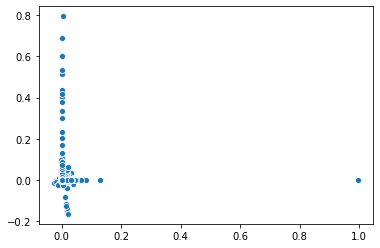

In [21]:
sns.scatterplot(X_pca[:,0],X_pca[:,1])
print(f"2D feature reduction explains variance of {round(sum(pca.explained_variance_ratio_)*100,3)} %")

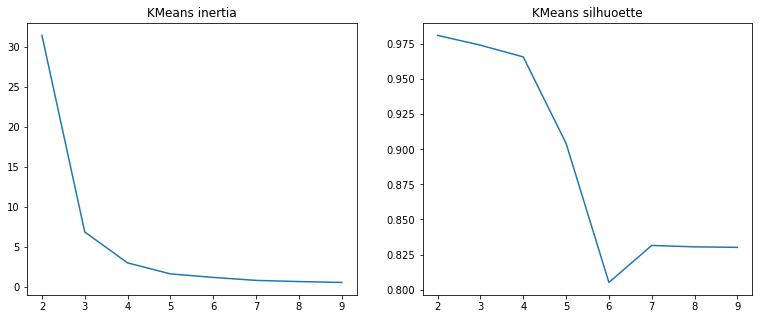

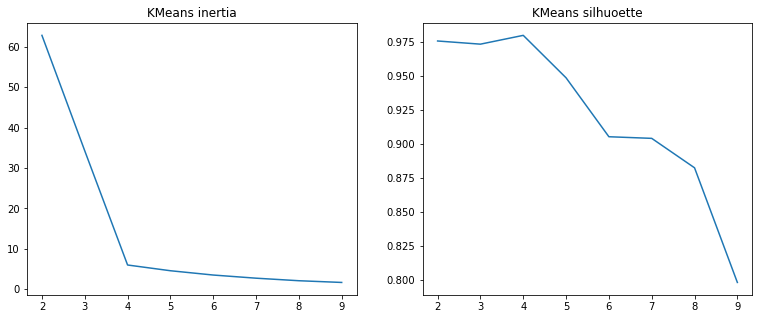

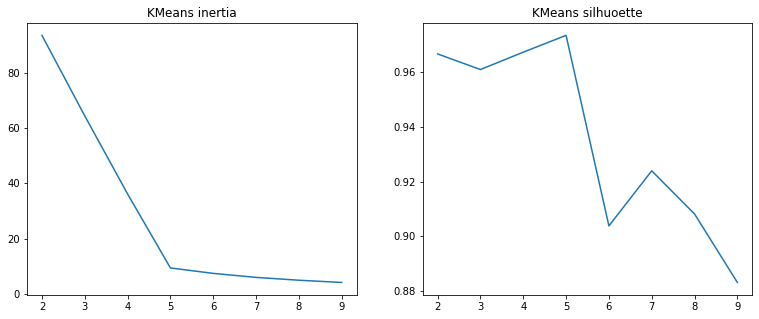

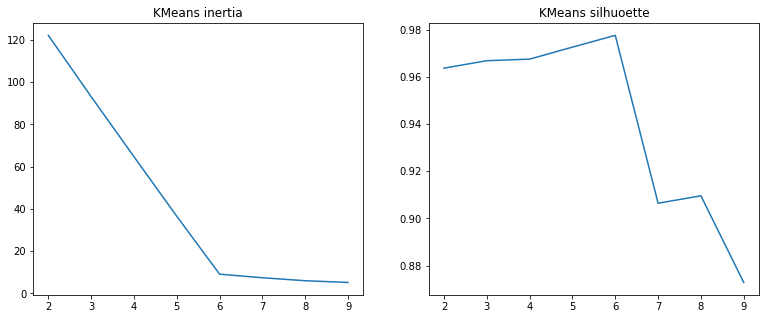

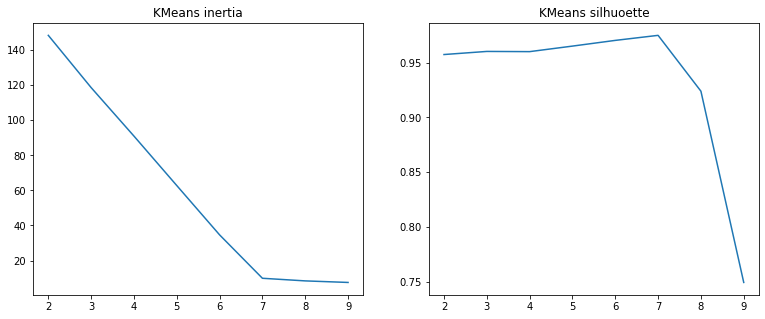

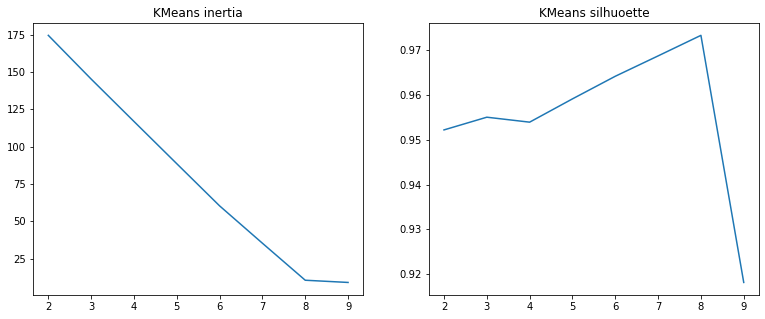

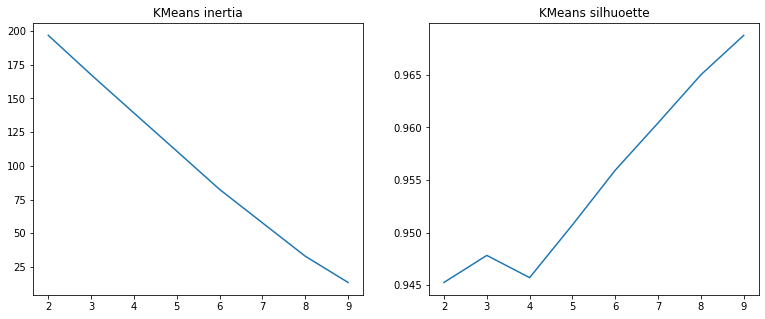

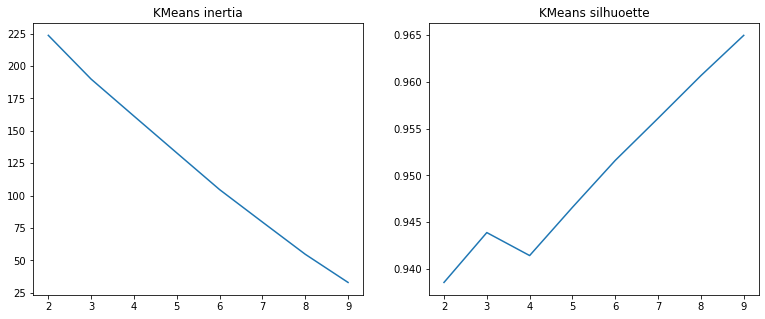

In [22]:
from sklearn.cluster import KMeans#, AgglomerativeClustering
from sklearn.metrics import silhouette_score

for x in range(2,10):
    pca=TruncatedSVD(n_components=x)
    X_pca=pca.fit_transform(X)
    kmeans_df=pd.DataFrame(columns=['inertia','silhouette'],index=range(2,10))
    
    for k in kmeans_df.index:
        km=KMeans(n_clusters=k)
        km.fit(X_pca)
        kmeans_df.loc[k,'inertia']=km.inertia_
        kmeans_df.loc[k,'silhouette']=silhouette_score(X_pca,km.predict(X_pca))

    plt.figure(figsize=(13,5))
    plt.subplot(1,2,1)
    plt.plot(kmeans_df["inertia"]),plt.title("KMeans inertia")
    plt.subplot(1,2,2)
    plt.plot(kmeans_df["silhouette"]),plt.title("KMeans silhuoette")

In [23]:
#Continue Kmeans clustering with 3 clusters?

pca=TruncatedSVD(n_components=2)
km=KMeans(n_clusters=4)
X_pca=pca.fit_transform(X)
km.fit(X_pca)
mask=km.predict(X_pca)

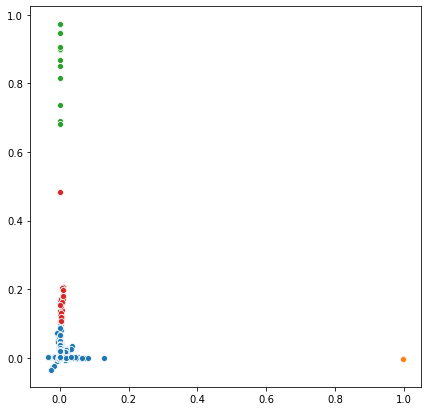

In [24]:
plt.figure(figsize=(7,7))
for i in range(km.n_clusters):
    sns.scatterplot(x=X_pca[mask==i,0],y=X_pca[mask==i,1])

In [25]:
freq=train['text'][0:1000].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [87]:
import scipy.sparse
data_tweet_length=pd.DataFrame(pd.arrays.SparseArray(data['tweet_length'].values))
data_unique_length=pd.DataFrame(pd.arrays.SparseArray(data['unique_length'].values))

In [89]:
X=hstack([X,data_tweet_length,data_unique_length],format='csr')
#data['tweet_length'].values.reshape(1,-1)

In [90]:
ntrain=len(train)
X_training_data=X[:ntrain]
X_testing_data=X[ntrain:]
y_training_data=data['target'][:ntrain]

In [91]:
from sklearn.model_selection import train_test_split, cross_validate,RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix,f1_score
X_train,X_test,y_train,y_test=train_test_split(X_training_data,y_training_data,stratify=y_training_data,random_state=42)

In [92]:
#5 dimensions seem to work for now
for n in range(2,10):
    lr=SGDClassifier(loss='log')
    pca=TruncatedSVD(n_components=3)
    X_train_pca=pca.fit_transform(X_train)
    X_test_pca=pca.transform(X_test)
    lr.fit(X_train_pca,y_train)
    training_score=cross_validate(lr,X_train_pca,y_train,scoring='f1_weighted',cv=3)['test_score'].mean()
    print(f'Feature reduction to {n} dimensions gives a training f1 score of {round(training_score,4)}') 

Feature reduction to 2 dimensions gives a training f1 score of 0.3708
Feature reduction to 3 dimensions gives a training f1 score of 0.343
Feature reduction to 4 dimensions gives a training f1 score of 0.3675
Feature reduction to 5 dimensions gives a training f1 score of 0.3087
Feature reduction to 6 dimensions gives a training f1 score of 0.326
Feature reduction to 7 dimensions gives a training f1 score of 0.4194
Feature reduction to 8 dimensions gives a training f1 score of 0.3704
Feature reduction to 9 dimensions gives a training f1 score of 0.3199


In [134]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
import lightgbm as lgb
import time

pca=TruncatedSVD(n_components=7)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

lr=SGDClassifier(loss='hinge')
svc=SVC(probability=True)
knn=KNeighborsClassifier()
dtr=DecisionTreeClassifier()
rfc=RandomForestClassifier()

models={"Logistic regression":lr,"Support vector classifier": svc,"K neighbours classifier":knn, \
       "Decision tree classifier": dtr, "Random forest classifier": rfc}

In [135]:
#Untuned model predictions and score
#This implies the data is non-linear (duh it's freaking text). Props to K nieghbours & RFC.
base_model_scores=pd.DataFrame(index=models.keys(),columns=[["training score","testing score"]])
t0=time.time()
for key,model in models.items():
    model.fit(X_train_pca,y_train)
    train_score=cross_validate(model,X_train_pca,y_train,scoring='f1_weighted',cv=3)['test_score'].mean()
    pred=model.predict(X_test_pca)
    f1=f1_score(y_test,pred,average='weighted')
    base_model_scores.loc[key,"training score"]=train_score.mean()
    base_model_scores.loc[key,"testing score"]=f1
    print(time.time()-t0)
base_model_scores

0.13717865943908691
10.416641473770142
10.624455451965332
10.77427864074707
13.946897268295288


,training score,testing score
Logistic regression,0.418139,0.482593
Support vector classifier,0.414275,0.414335
K neighbours classifier,0.628342,0.637858
Decision tree classifier,0.626892,0.631268
Random forest classifier,0.691836,0.694086


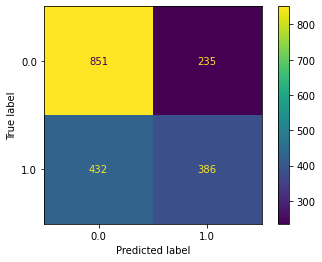

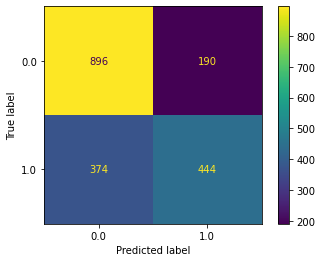

In [104]:
plot_confusion_matrix(knn,X_test_pca,y_test)
plot_confusion_matrix(rfc,X_test_pca,y_test)

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [131]:
knn_params={
    'n_neighbors': range(3,8),
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(5,15),
    'p':[1,2]
    
}

rfc_params= {
    'n_estimators': range(500,900,50),
    'criterion': ['gini','entropy'],
    'max_samples': np.arange(0.1,1,0.1),
    'max_features': range(5,10,2),
    'max_depth': range(35,70,5)
}

In [124]:
rfc?

In [107]:
knn_random=RandomizedSearchCV(knn,param_distributions=knn_params,scoring='f1_weighted',cv=3, verbose=10)
knn_random.fit(X_train_pca,y_train)
knn_random.best_params_,knn_random.best_score_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] p=2, n_neighbors=5, leaf_size=10, algorithm=brute ...............
[CV]  p=2, n_neighbors=5, leaf_size=10, algorithm=brute, score=0.631, total=   0.2s
[CV] p=2, n_neighbors=5, leaf_size=10, algorithm=brute ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  p=2, n_neighbors=5, leaf_size=10, algorithm=brute, score=0.625, total=   0.2s
[CV] p=2, n_neighbors=5, leaf_size=10, algorithm=brute ...............
[CV]  p=2, n_neighbors=5, leaf_size=10, algorithm=brute, score=0.616, total=   0.2s
[CV] p=1, n_neighbors=4, leaf_size=8, algorithm=ball_tree ............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV]  p=1, n_neighbors=4, leaf_size=8, algorithm=ball_tree, score=0.625, total=   0.1s
[CV] p=1, n_neighbors=4, leaf_size=8, algorithm=ball_tree ............
[CV]  p=1, n_neighbors=4, leaf_size=8, algorithm=ball_tree, score=0.608, total=   0.1s
[CV] p=1, n_neighbors=4, leaf_size=8, algorithm=ball_tree ............
[CV]  p=1, n_neighbors=4, leaf_size=8, algorithm=ball_tree, score=0.619, total=   0.1s
[CV] p=2, n_neighbors=4, leaf_size=10, algorithm=ball_tree ...........
[CV]  p=2, n_neighbors=4, leaf_size=10, algorithm=ball_tree, score=0.622, total=   0.1s
[CV] p=2, n_neighbors=4, leaf_size=10, algorithm=ball_tree ...........


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.7s remaining:    0.0s


[CV]  p=2, n_neighbors=4, leaf_size=10, algorithm=ball_tree, score=0.597, total=   0.1s
[CV] p=2, n_neighbors=4, leaf_size=10, algorithm=ball_tree ...........
[CV]  p=2, n_neighbors=4, leaf_size=10, algorithm=ball_tree, score=0.609, total=   0.1s
[CV] p=2, n_neighbors=3, leaf_size=11, algorithm=auto ................
[CV]  p=2, n_neighbors=3, leaf_size=11, algorithm=auto, score=0.627, total=   0.1s
[CV] p=2, n_neighbors=3, leaf_size=11, algorithm=auto ................
[CV]  p=2, n_neighbors=3, leaf_size=11, algorithm=auto, score=0.620, total=   0.1s
[CV] p=2, n_neighbors=3, leaf_size=11, algorithm=auto ................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s


[CV]  p=2, n_neighbors=3, leaf_size=11, algorithm=auto, score=0.621, total=   0.1s
[CV] p=1, n_neighbors=3, leaf_size=10, algorithm=brute ...............
[CV]  p=1, n_neighbors=3, leaf_size=10, algorithm=brute, score=0.635, total=   0.1s
[CV] p=1, n_neighbors=3, leaf_size=10, algorithm=brute ...............
[CV]  p=1, n_neighbors=3, leaf_size=10, algorithm=brute, score=0.612, total=   0.1s
[CV] p=1, n_neighbors=3, leaf_size=10, algorithm=brute ...............
[CV]  p=1, n_neighbors=3, leaf_size=10, algorithm=brute, score=0.627, total=   0.1s
[CV] p=2, n_neighbors=6, leaf_size=8, algorithm=brute ................
[CV]  p=2, n_neighbors=6, leaf_size=8, algorithm=brute, score=0.624, total=   0.2s
[CV] p=2, n_neighbors=6, leaf_size=8, algorithm=brute ................
[CV]  p=2, n_neighbors=6, leaf_size=8, algorithm=brute, score=0.617, total=   0.2s
[CV] p=2, n_neighbors=6, leaf_size=8, algorithm=brute ................
[CV]  p=2, n_neighbors=6, leaf_size=8, algorithm=brute, score=0.606, tota

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.3s finished


({'p': 1, 'n_neighbors': 3, 'leaf_size': 10, 'algorithm': 'brute'},
 0.6246256111356855)

In [108]:
f1_score(y_test,knn_random.best_estimator_.predict(X_test_pca),average='weighted')

0.6427746271263343

In [132]:
rfc_random=RandomizedSearchCV(rfc,param_distributions=rfc_params,scoring='f1_weighted',cv=3, verbose=10)
rfc_random.fit(X_train_pca,y_train)
rfc_random.best_params_,rfc_random.best_score_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=800, max_samples=0.30000000000000004, max_features=9, max_depth=65, criterion=gini 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\matth\anaconda3\envs\

[CV]  n_estimators=800, max_samples=0.30000000000000004, max_features=9, max_depth=65, criterion=gini, score=nan, total=   0.2s
[CV] n_estimators=800, max_samples=0.30000000000000004, max_features=9, max_depth=65, criterion=gini 


C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = se

[CV]  n_estimators=800, max_samples=0.30000000000000004, max_features=9, max_depth=65, criterion=gini, score=nan, total=   0.3s
[CV] n_estimators=800, max_samples=0.30000000000000004, max_features=9, max_depth=65, criterion=gini 


C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = se

[CV]  n_estimators=800, max_samples=0.30000000000000004, max_features=9, max_depth=65, criterion=gini, score=nan, total=   0.2s
[CV] n_estimators=700, max_samples=0.6, max_features=9, max_depth=55, criterion=gini 


C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = se

[CV]  n_estimators=700, max_samples=0.6, max_features=9, max_depth=55, criterion=gini, score=nan, total=   0.2s
[CV] n_estimators=700, max_samples=0.6, max_features=9, max_depth=55, criterion=gini 


C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = se

[CV]  n_estimators=700, max_samples=0.6, max_features=9, max_depth=55, criterion=gini, score=nan, total=   0.2s
[CV] n_estimators=700, max_samples=0.6, max_features=9, max_depth=55, criterion=gini 


C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = se

[CV]  n_estimators=700, max_samples=0.6, max_features=9, max_depth=55, criterion=gini, score=nan, total=   0.2s
[CV] n_estimators=500, max_samples=0.5, max_features=7, max_depth=35, criterion=gini 
[CV]  n_estimators=500, max_samples=0.5, max_features=7, max_depth=35, criterion=gini, score=0.685, total=   5.2s
[CV] n_estimators=500, max_samples=0.5, max_features=7, max_depth=35, criterion=gini 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.5s remaining:    0.0s


[CV]  n_estimators=500, max_samples=0.5, max_features=7, max_depth=35, criterion=gini, score=0.683, total=   5.1s
[CV] n_estimators=500, max_samples=0.5, max_features=7, max_depth=35, criterion=gini 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   11.6s remaining:    0.0s


[CV]  n_estimators=500, max_samples=0.5, max_features=7, max_depth=35, criterion=gini, score=0.693, total=   5.2s
[CV] n_estimators=700, max_samples=0.6, max_features=9, max_depth=60, criterion=gini 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   16.7s remaining:    0.0s
C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\matth\anaconda3\envs\K

[CV]  n_estimators=700, max_samples=0.6, max_features=9, max_depth=60, criterion=gini, score=nan, total=   0.2s
[CV] n_estimators=700, max_samples=0.6, max_features=9, max_depth=60, criterion=gini 


C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = se

[CV]  n_estimators=700, max_samples=0.6, max_features=9, max_depth=60, criterion=gini, score=nan, total=   0.2s
[CV] n_estimators=700, max_samples=0.6, max_features=9, max_depth=60, criterion=gini 


C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = se

[CV]  n_estimators=700, max_samples=0.6, max_features=9, max_depth=60, criterion=gini, score=nan, total=   0.2s
[CV] n_estimators=850, max_samples=0.1, max_features=7, max_depth=55, criterion=entropy 
[CV]  n_estimators=850, max_samples=0.1, max_features=7, max_depth=55, criterion=entropy, score=0.686, total=   3.6s
[CV] n_estimators=850, max_samples=0.1, max_features=7, max_depth=55, criterion=entropy 
[CV]  n_estimators=850, max_samples=0.1, max_features=7, max_depth=55, criterion=entropy, score=0.679, total=   3.6s
[CV] n_estimators=850, max_samples=0.1, max_features=7, max_depth=55, criterion=entropy 
[CV]  n_estimators=850, max_samples=0.1, max_features=7, max_depth=55, criterion=entropy, score=0.685, total=   3.6s
[CV] n_estimators=550, max_samples=0.30000000000000004, max_features=9, max_depth=45, criterion=entropy 
[CV]  n_estimators=550, max_samples=0.30000000000000004, max_features=9, max_depth=45, criterion=entropy, score=nan, total=   0.2s
[CV] n_estimators=550, max_samples

C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = se

[CV]  n_estimators=550, max_samples=0.30000000000000004, max_features=9, max_depth=45, criterion=entropy, score=nan, total=   0.2s
[CV] n_estimators=550, max_samples=0.30000000000000004, max_features=9, max_depth=45, criterion=entropy 
[CV]  n_estimators=550, max_samples=0.30000000000000004, max_features=9, max_depth=45, criterion=entropy, score=nan, total=   0.2s
[CV] n_estimators=550, max_samples=0.4, max_features=9, max_depth=55, criterion=gini 


C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = se

[CV]  n_estimators=550, max_samples=0.4, max_features=9, max_depth=55, criterion=gini, score=nan, total=   0.2s
[CV] n_estimators=550, max_samples=0.4, max_features=9, max_depth=55, criterion=gini 
[CV]  n_estimators=550, max_samples=0.4, max_features=9, max_depth=55, criterion=gini, score=nan, total=   0.2s
[CV] n_estimators=550, max_samples=0.4, max_features=9, max_depth=55, criterion=gini 


C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\matth\anaconda3\envs\Kaggle\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = se

[CV]  n_estimators=550, max_samples=0.4, max_features=9, max_depth=55, criterion=gini, score=nan, total=   0.2s
[CV] n_estimators=800, max_samples=0.6, max_features=7, max_depth=35, criterion=gini 
[CV]  n_estimators=800, max_samples=0.6, max_features=7, max_depth=35, criterion=gini, score=0.689, total=   9.6s
[CV] n_estimators=800, max_samples=0.6, max_features=7, max_depth=35, criterion=gini 
[CV]  n_estimators=800, max_samples=0.6, max_features=7, max_depth=35, criterion=gini, score=0.683, total=   9.5s
[CV] n_estimators=800, max_samples=0.6, max_features=7, max_depth=35, criterion=gini 
[CV]  n_estimators=800, max_samples=0.6, max_features=7, max_depth=35, criterion=gini, score=0.690, total=   9.4s
[CV] n_estimators=550, max_samples=0.4, max_features=5, max_depth=65, criterion=entropy 
[CV]  n_estimators=550, max_samples=0.4, max_features=5, max_depth=65, criterion=entropy, score=0.686, total=   6.2s
[CV] n_estimators=550, max_samples=0.4, max_features=5, max_depth=65, criterion=en

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.4min finished


({'n_estimators': 550,
  'max_samples': 0.4,
  'max_features': 5,
  'max_depth': 65,
  'criterion': 'entropy'},
 0.6906975175050332)

In [133]:
f1_score(y_test,rfc_random.best_estimator_.predict(X_test_pca),average='weighted')

0.7079954235093563

In [136]:
ensemble=VotingClassifier(estimators=[('dtr',dtr),('rfc',rfc_random.best_estimator_),('knn',knn_random.best_estimator_)])

In [137]:
ensemble.fit(X_train_pca,y_train)

VotingClassifier(estimators=[('dtr', DecisionTreeClassifier()),
                             ('rfc',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=65,
                                                     max_features=5,
                                                     max_samples=0.4,
                                                     n_estimators=550)),
                             ('knn',
                              KNeighborsClassifier(algorithm='brute',
                                                   leaf_size=10, n_neighbors=3,
                                                   p=1))])

In [138]:
f1_score(y_test,ensemble.predict(X_test_pca),average='weighted')

0.6969824368725357

In [75]:
pipeline_sgd=Pipeline(steps=[('tfidf',tfidf),('sgd',SGDClassifier() )])

#Workshop params
pipeline_params = {
    'sgd__loss': ['hinge', 'log'],
    'sgd__penalty': ['l1', 'l2', 'elasticnet'],
    'sgd__alpha': [.0001, .0005, .001]    
}
# Apparently my params don't work... maybe its the way the keys are spelled
#pipeline_params={
#    'sgd_loss': ['hinge','log'],
#    'sgd_penalty': ['l2','l1','elasticnet'],
#    'sgd_alpha': [0.0001,0.0005,0.001]
#    
#}

In [77]:
def fit_cross_validate_model(algo,params,X_train,X_test,y_train,y_test):
    gs=GridSearchCV(algo,params,scoring=['precision_macro','recall_macro','accuracy'],refit='precision_macro',n_jobs=4,verbose=10)
    gs.fit(X_train,y_train)
    print('best params: ',gs.best_params_)
    print('score on test set: ',gs.score(X_test,y_test))
    return( gs , gs.predict(X_test) )

In [78]:
gs_sgd , pred_sgd  =fit_cross_validate_model(pipeline_sgd,pipeline_params,X_train,X_test,y_train,y_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    8.6s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   12.5s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   20.8s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   25.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   36.9s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   44.4s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   56.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:  1.6min finished


best params:  {'sgd__alpha': 0.001, 'sgd__loss': 'hinge', 'sgd__penalty': 'l2'}
score on test set:  0.8203968253968255


In [80]:
print(classification_report(y_test,pred_sgd))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1086
           1       0.90      0.56      0.69       818

    accuracy                           0.78      1904
   macro avg       0.82      0.75      0.76      1904
weighted avg       0.81      0.78      0.77      1904

